In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyElab import osci

In [2]:
## channel color scheme; yellow for no channel
osci.Channel.colors = ['yellow',  'deepskyblue',  'orangered', 'lawngreen',  'magenta', 'dodgerblue']

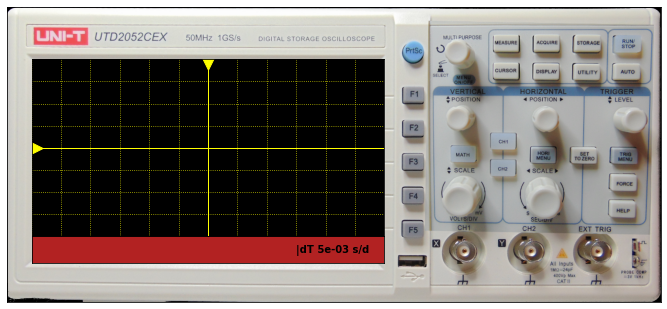

added channel 1 and set it as trigger signal


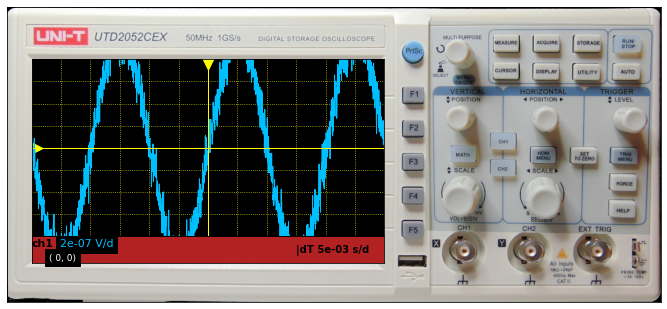

In [3]:
o = osci.Oscilloscope()

## no channels connected - no signal shown
o.show()


## null signal to show base (cofigurable) background noise
null_sig = osci.Signal()
c1 = osci.Channel(null_sig)  ## noise is additional channel signal noise; 
                                                       ##ind of osci noise
o.add_channel(c1)
o.show()

added channel 1 and set it as trigger signal


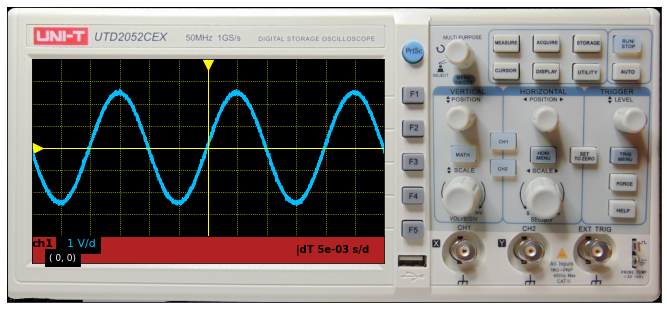

In [4]:
o = osci.Oscilloscope()

#### harmonic signal
## osci.Signal is the basic class for representing signal
# spectrum is a list of [freq., Amp] pairs
# noise is gaussian std
s1 = osci.Signal(spectrum = [[50, 2.5]], noise = 0.05)

## osci.Channel represents input channel. it has extra attribs for displays and triggers
c1 = osci.Channel(s1)
c1.voltdiv = 1

o.add_channel(c1)

o.step()
o.show()

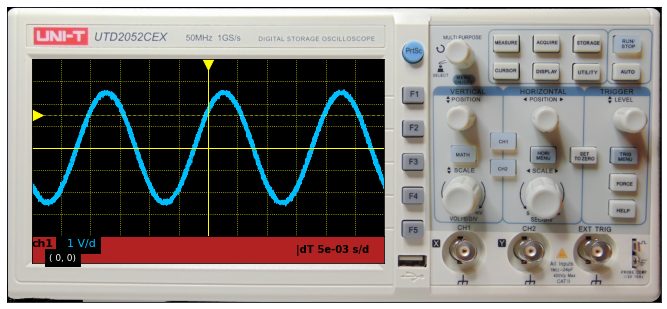

In [5]:
## trigger
c1.trig = 1.5
o.step()
o.show()

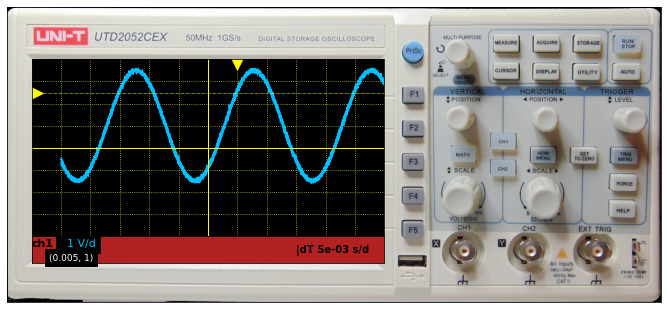

In [6]:
## shift
c1.dh = 0.005
c1.dv = 1
o.step()
o.show()

added channel 1 and set it as trigger signal
added channel 2


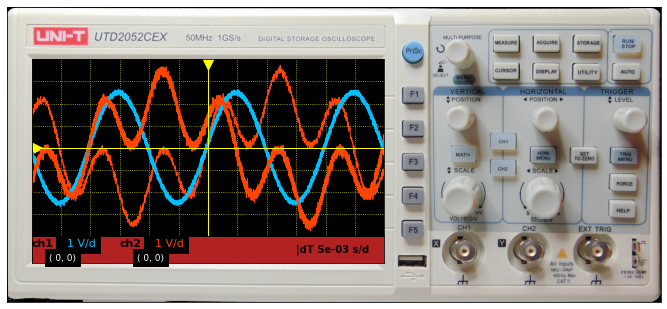

In [7]:
o = osci.Oscilloscope()

## two channels, TY mode
s1 = osci.Signal(spectrum = [[50, 2.5]], noise = 0.05)
s2 = osci.Signal(spectrum = [[100, 1.5], [20, 2]], noise = 0.1)

c1 = osci.Channel(s1)
c1.voltdiv = 1
c2 = osci.Channel(s2)
c2.voltdiv = 1

o.add_channel(c1)
o.add_channel(c2, trig = False)  ## c1 remains triggering

o.step()
o.show()

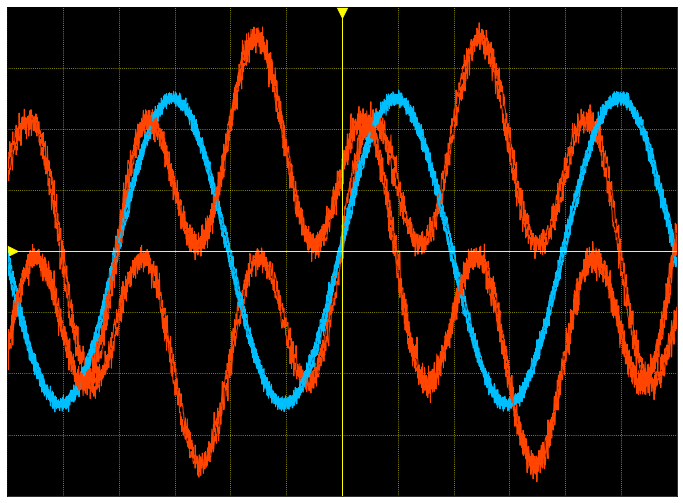

In [8]:
## take just the screen; 1:1 aspect
o.screen()

added channel 1 and set it as trigger signal
added channel 2


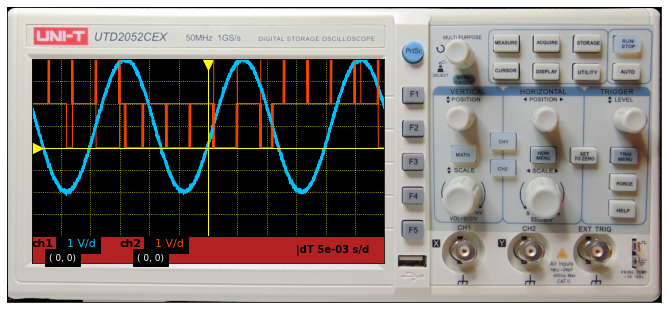

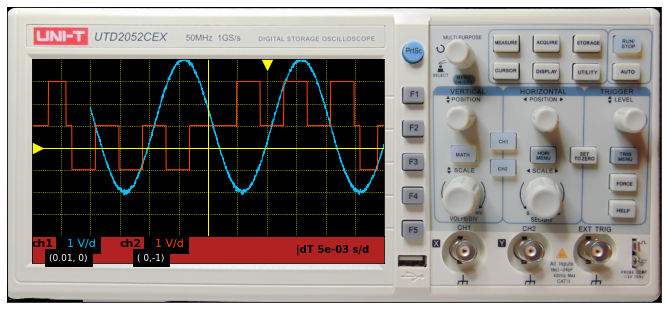

In [9]:
o = osci.Oscilloscope()

## square signal in channel 2
s1 = osci.Signal(offset = 1, spectrum = [[50, 3]], noise = 0.05)
s2 = osci.Signal(square = [[125, 2, 0.7], [20, 2, 0.2]])

c1 = osci.Channel(s1)
c1.voltdiv = 1
c2 = osci.Channel(s2)
c2.voltdiv = 1

o.add_channel(c1)
o.add_channel(c2, trig = False)

o.step()
o.show()


## only one sample instead of default 5
o.clear()  
c1.dh = 0.01
c2.dv = -1
o.show()

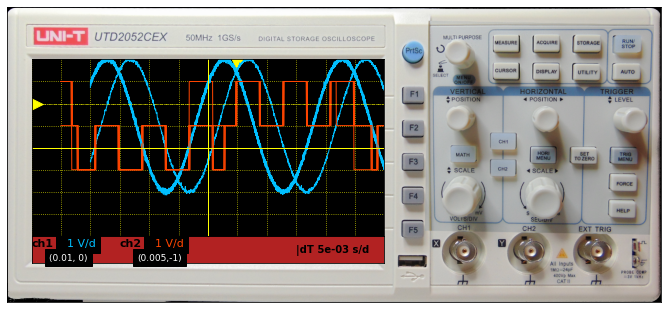

In [10]:
o.trig_channel = c2   ## c2 is now triggering
c2.trig = 3
c2.dh = 0.005
o.step()
o.show()

added channel 1 and set it as trigger signal
added channel 2


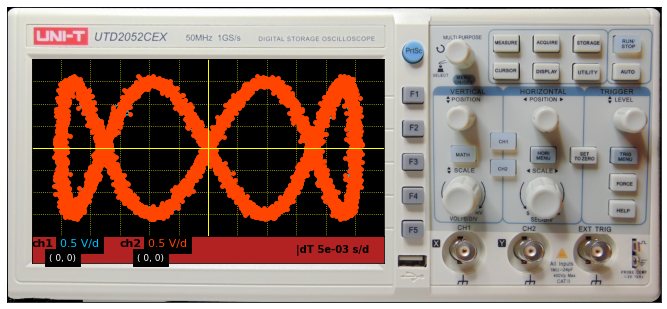

In [11]:
o = osci.Oscilloscope()

## x-y mode
s1 = osci.Signal(spectrum = [[50, 2.5]], noise = 0.05)
s2 = osci.Signal(spectrum = [[200, 1.5]], noise = 0.05)

c1 = osci.Channel(s1)
c1.voltdiv = 0.5
c2 = osci.Channel(s2)
c2.voltdiv = 0.5

o.add_channel(c1)
o.add_channel(c2, trig = False)

o.mode = [c1,c2] ### set this to list of the x-y channels. any other shows all TYs

o.step()
o.show()

added channel 3


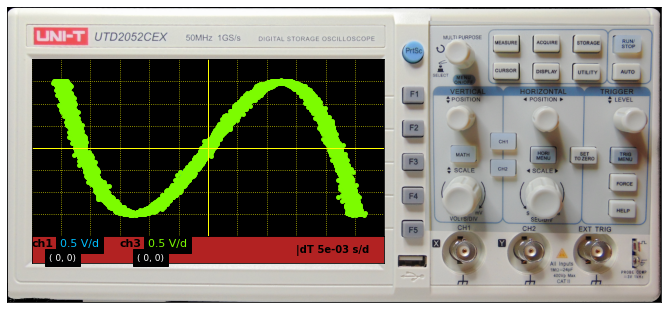

In [12]:
s3 = osci.Signal(spectrum = [[150, 1.5]], noise = 0.01)
c3 = osci.Channel(s3)
c3.voltdiv = 0.5

o.add_channel(c3, trig = False)
o.mode = [c1, c3]

o.step()
o.show()

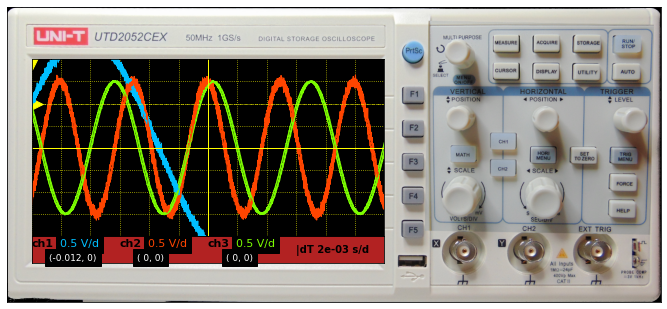

In [13]:
## 3 channels
o.mode = 'for TY, this may be whatever-just not a list of [chX,chY]'
o.secdiv = 2e-3
c1.trig = 1
c1.dh = - 6 * o.secdiv   ## put trigger to origin
o.step()
o.show()

added channel 4


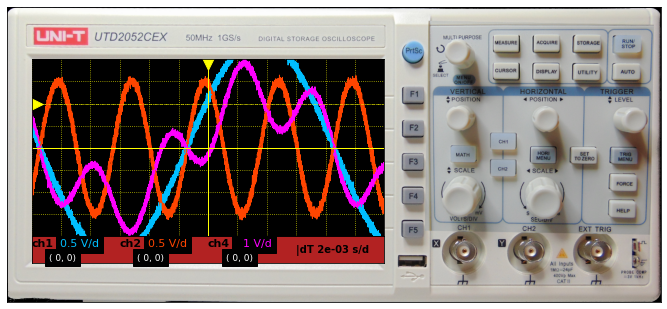

In [14]:
c4 = osci.DiffChannel( c1 , c2 )
c4.voltdiv = 1
o.add_channel( c4, trig = False )

c1.dh=0            ## align
c3.active = False  ## turn off

o.step()
o.show()

added channel 1 and set it as trigger signal
added channel 2


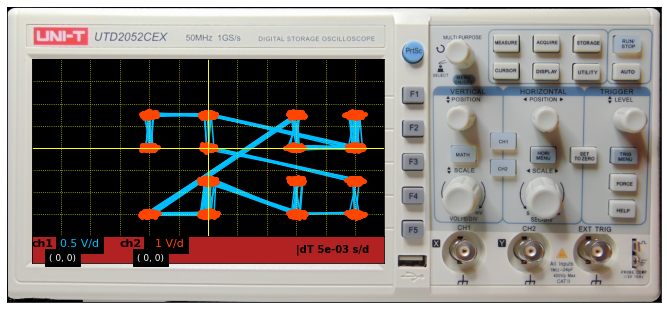

In [15]:
o = osci.Oscilloscope()

## x-y with squares
s1 = osci.Signal(offset = -1, square = [[50, 2.5, 0.3],[75, 1, 0.01, 0.6]], noise = 0.05)
s2 = osci.Signal(square = [[200, 1.5,0.7], [25, -3, 0.2]], noise = 0.05)

c1 = osci.Channel(s1)
c1.voltdiv = 0.5
c2 = osci.Channel(s2)
c2.voltdiv = 1

o.add_channel(c1)
o.add_channel(c2, trig = False)

o.mode = [c1,c2] ### set this to list of the x-y channels. any other shows all TYs

o.step()
o.show()